# Data Wrangling

Data wrangling consists of three steps — gather, assess and clean.

## Gathering Data

### Importing libraries

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Loading Dataset

In [168]:
titanic = sns.load_dataset('titanic')

### Checking Data

In [169]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [170]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [171]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [172]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [173]:
# titanic.index.values
titanic.shape

(891, 15)

In [174]:
titanic.rename(columns={'who':'PType'}, inplace=True)

## Cleaning Data

### Check for Missing Values

In [175]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
PType            0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [176]:
titanic.isna().sum() * 100 / len(titanic)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
PType           0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [177]:
titanic.drop(columns='deck', inplace=True)

In [178]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [179]:
titanic.isna().sum() * 100 / len(titanic)

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
PType          0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [180]:
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

In [181]:
titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
PType          0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

### Outliers Removal

- Visualization
- IQR method
- Z-Score

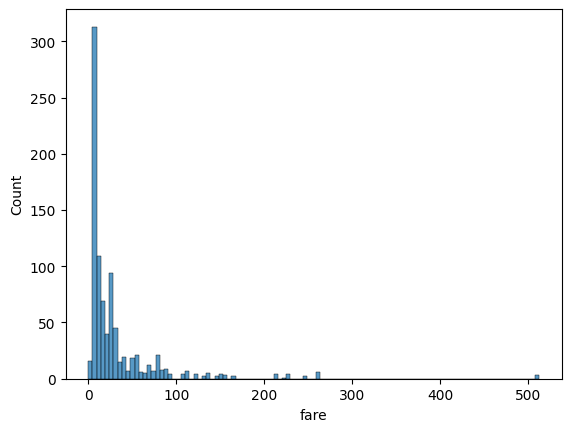

In [182]:
sns.histplot(x="fare", data=titanic)
plt.show()

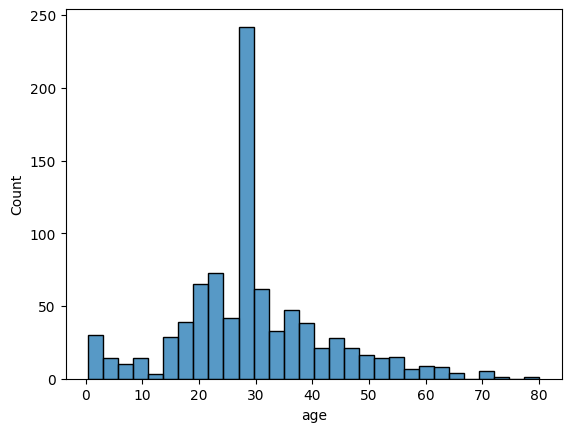

In [183]:
sns.histplot(x="age", data=titanic)
plt.show()

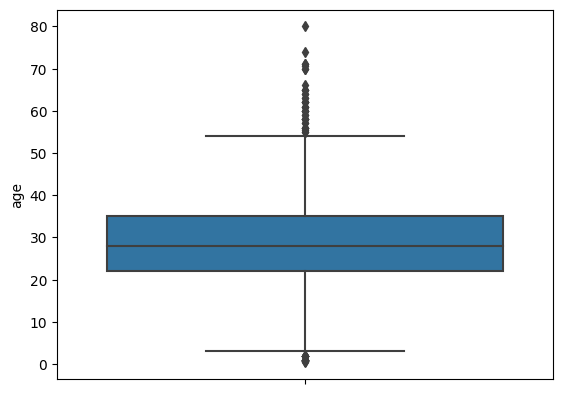

In [184]:
# check visualization
sns.boxplot(y="age", data=titanic)
plt.show()

In [185]:
# Using IQR method removing outliers

Q3 = titanic["age"].quantile(0.75)
Q1 = titanic["age"].quantile(0.25)

iqr = Q3 - Q1

upper = Q3 + (1.5 * iqr)
lower = Q1 - (1.5 * iqr)

titanic = titanic[(titanic["age"] > lower) & (titanic["age"] < upper)]
titanic["age"].describe()

count    825.000000
mean      28.515152
std       10.177256
min        3.000000
25%       22.000000
50%       28.000000
75%       34.000000
max       54.000000
Name: age, dtype: float64

In [186]:
Q3 = titanic["fare"].quantile(0.75)
Q1 = titanic["fare"].quantile(0.25)

iqr = Q3 - Q1

upper = Q3 + (1.5 * iqr)
lower = Q1 - (1.5 * iqr)

titanic = titanic[(titanic["fare"] > lower) & (titanic["fare"] < upper)]
titanic["fare"].describe()

count    718.000000
mean      17.193204
std       13.244507
min        0.000000
25%        7.889575
50%       11.750000
75%       25.928150
max       61.379200
Name: fare, dtype: float64

In [187]:
titanic.shape

(718, 14)

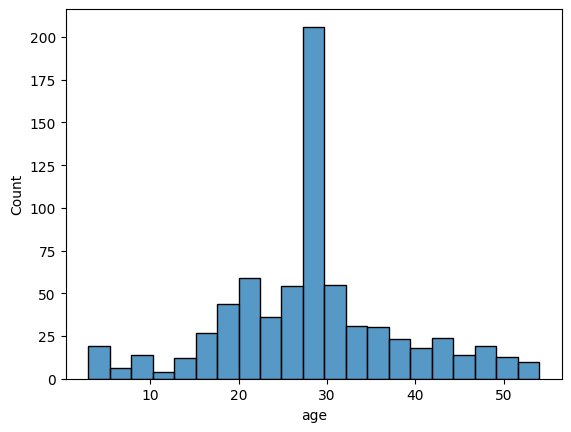

In [188]:
sns.histplot(x="age", data=titanic)
plt.show()

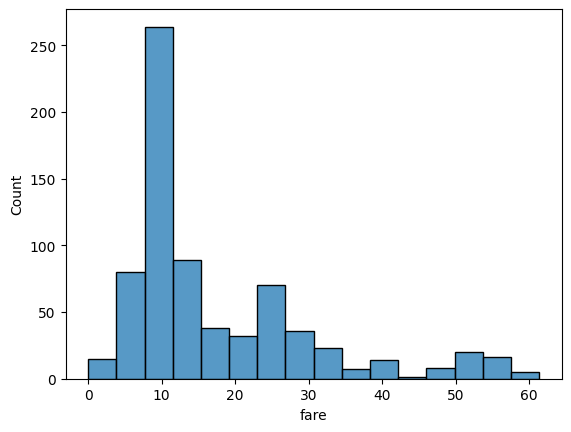

In [189]:
sns.histplot(x="fare", data=titanic)
plt.show()

### Dropping Duplicates

In [190]:
titanic_duplicates = titanic[titanic.duplicated()]
titanic_duplicates.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,PType,adult_male,embark_town,alive,alone
47,1,3,female,28.0,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
55,1,1,male,28.0,0,0,35.5000,S,First,man,True,Southampton,yes,True
76,0,3,male,28.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,28.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,28.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [191]:
titanic.duplicated().sum()

108

In [192]:
titanic.drop_duplicates(inplace=True)

In [193]:
titanic.shape

(610, 14)

## Transforming Data